# Inversion criterium

A figure to show the inversion criterium of `fdesign`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import empymod as epm

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

### "Normal" Curve, purely decaying

In [3]:
# Get filter, define l and r
filt1 = epm.fdesign.load_filter('wer201')
r1 = np.logspace(3, 5, 1000)
l1 = filt1.base/r1[:, None]

# Get EM-model, calculate theoretical and numerical response
tp1 = epm.fdesign.empy_hankel('j0', 50, 100, 1, 1)
theo1 = tp1.rhs(r1)
num1 = np.dot(tp1.lhs(l1), filt1.j0)/r1

# Calculate relative error
rel_error1 = np.abs((num1 - theo1)/theo1)

# Maximum r with error < X
rmin1 = np.where(rel_error1 > 0.098)[0][0]-1

# Minimum amplitude with error < X
amin1 = np.argmin(np.abs(num1[:rmin1+1]))

# Minimum amplitude
tmin1 = np.argmin(np.abs(num1))

### High frequency model, oscillating

In [4]:
# Get filter, define l and r
filt2 = epm.fdesign.load_filter('wer2001')
r2 = np.logspace(0, 1.575, 1000)
l2 = filt2.base/r2[:, None]

# Model parameters
model = {
    'zsrc': 0.0000001,
    'zrec': 1, 
    'depth': [0, 1],
    'res': [2e14, 200, 20] ,
    'freqtime': 200e6,
    'epermH': [1, 9, 15],
    'epermV': [1, 9, 15]}

# Get EM-model, calculate theoretical and numerical response
tp2 = epm.fdesign.empy_hankel('j0', **model)
empy2 = tp2.rhs(r2)
num2 = np.dot(tp2.lhs(l2), filt2.j0)/r2

# Calculate relative error
rel_error2 = np.abs((num2 - empy2)/empy2)

# Maximum r with error < X
# This error level (9.8 %) is made to have an extreme difference
# to show it clearly
rmin2 = np.where(rel_error2 > 0.2)[0][0]-1

# Minimum amplitude with error < X
amin2 = np.argmin(np.abs(num2[:rmin2+1]))

# Minimum amplitude
tmin2 = np.argmin(np.abs(num2))

### Figure

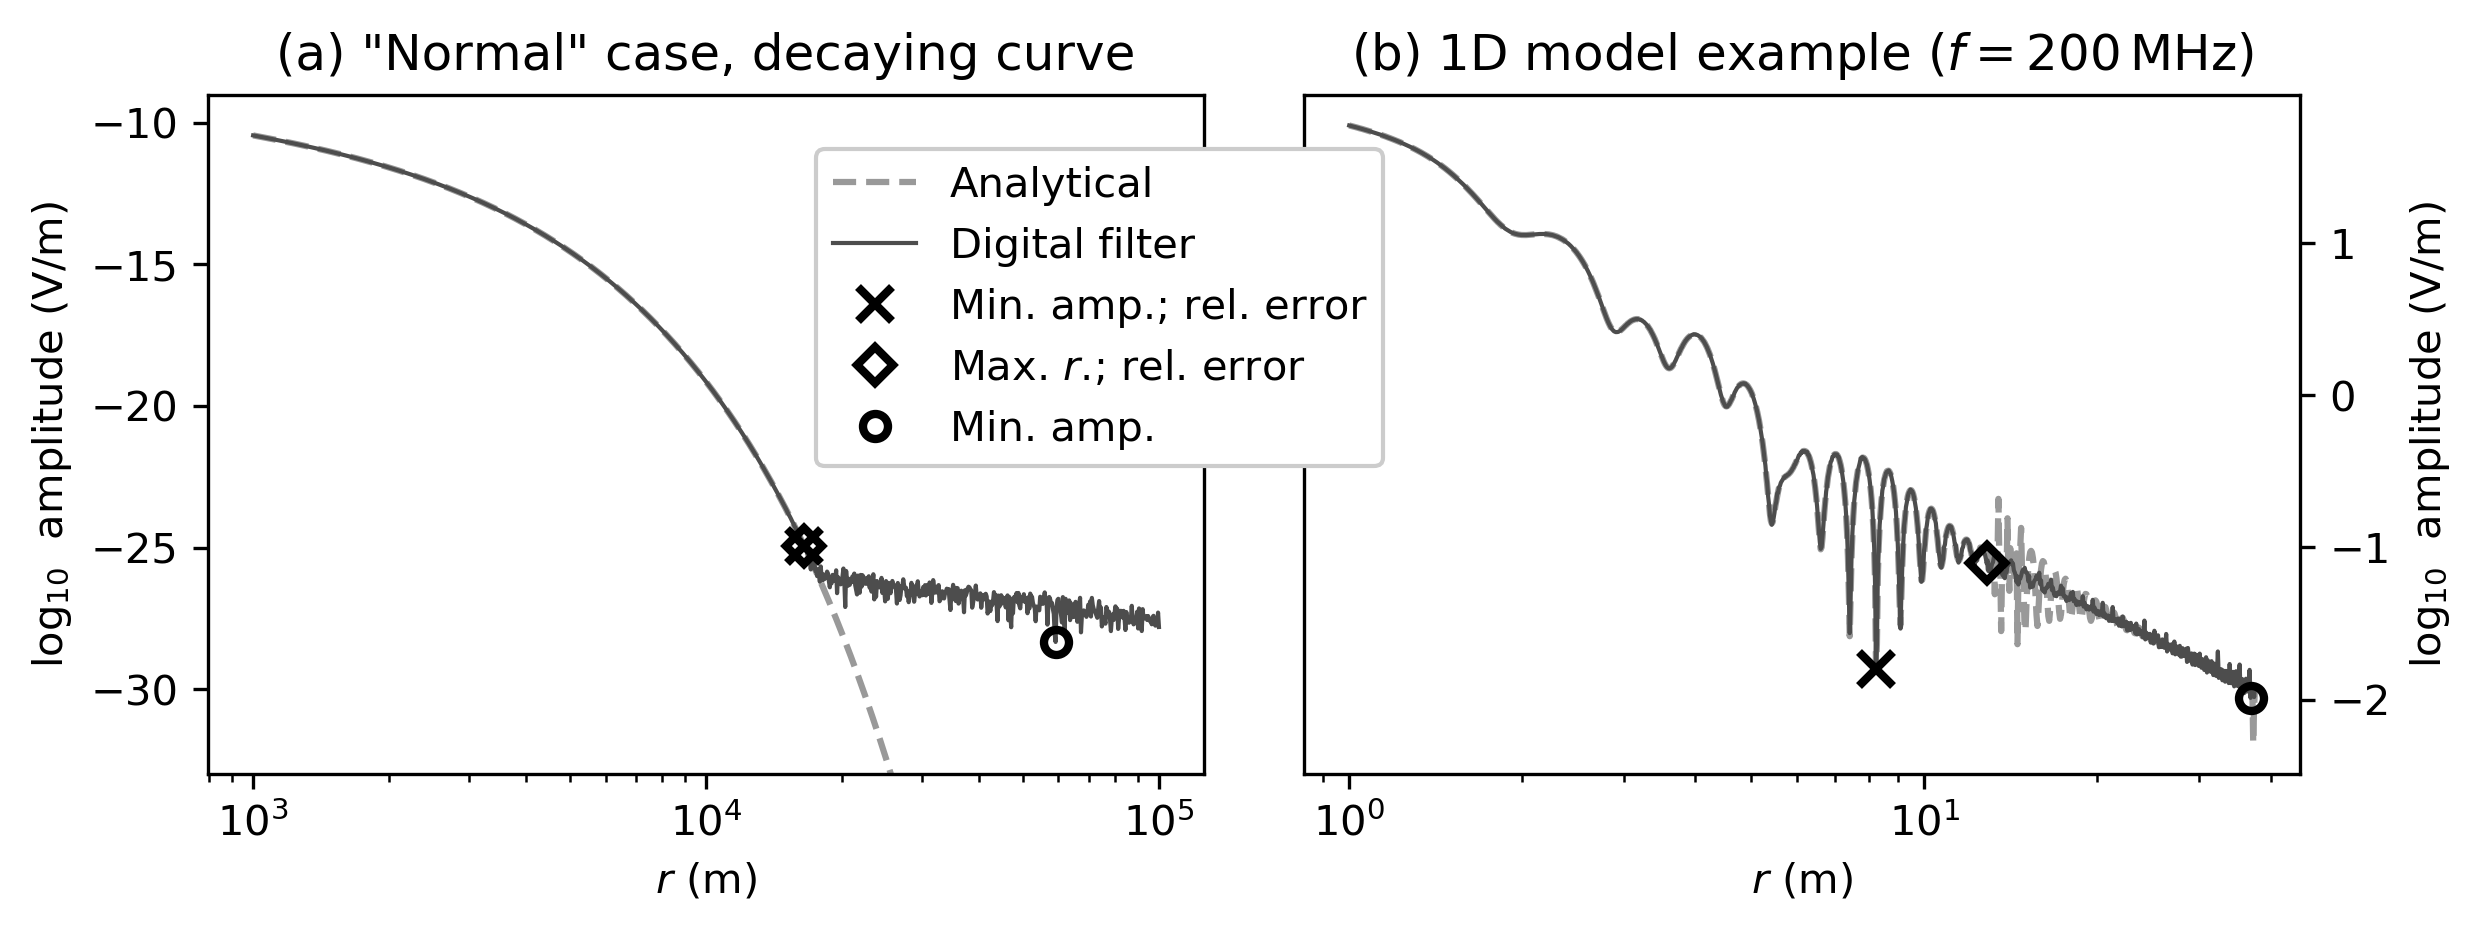

In [5]:
plt.figure(figsize=(9, 3))
plt.subplots_adjust(wspace=0.1)
params = {'mec': 'k', 'mew': 2, 'mfc': 'none'}

# (b) 1D model case
plt.subplot(122)
plt.title(r"(b) 1D model example ($f=200\,$MHz)")
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')
plt.semilogx(r2, np.log10(np.abs(empy2)), '--', c='.6', label='Analytical')
plt.semilogx(r2, np.log10(np.abs(num2)), '.3', lw=1, label='Digital filter')

plt.semilogx(r2[amin2], np.log10(np.abs(num2[amin2])), 'x', ms=8, **params)
plt.semilogx(r2[rmin2], np.log10(np.abs(num2[rmin2])), 'D', **params)
plt.semilogx(r2[tmin2], np.log10(np.abs(num2[tmin2])), 'o', **params)
plt.xlabel(r'$r$ (m)')
plt.ylabel(r'$\log_{10}\ $ amplitude (V/m)')

# (a) Normal case
plt.subplot(121)
plt.title('(a) "Normal" case, decaying curve')
plt.semilogx(r1, np.log10(np.abs(theo1)), '--', c='.6', label='Analytical')
plt.semilogx(r1, np.log10(np.abs(num1)), '.3', lw=1, label='Digital filter')
plt.semilogx(r1[amin1], np.log10(np.abs(num1[amin1])), 'x', ms=8, **params, label=r'Min. amp.; rel. error')
plt.semilogx(r1[rmin1], np.log10(np.abs(num1[rmin1])), 'D', **params, label=r'Max. $r$.; rel. error')
plt.semilogx(r1[tmin1], np.log10(np.abs(num1[tmin1])), 'o', **params, label='Min. amp.')
plt.ylim([-33, -9])
l = plt.legend(loc=1, bbox_to_anchor=(1.2, 0.95))
l.get_frame().set_alpha(1)
plt.xlabel(r'$r$ (m)')
plt.ylabel(r'$\log_{10}\ $ amplitude (V/m)')

# Save and show plot
#for ending in ['png', 'pdf', 'eps']:
#    plt.savefig('../figures/Figure-1-bw.'+ending, bbox_inches='tight')
plt.show()

In [6]:
epm.versions('HTML')